# Importing all the necessary libraries 

In [132]:
# Importing all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pickle

In [2]:
df=pd.read_csv('MagicBricks.csv')

In [3]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

# Data cleaning 

In [5]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [8]:
df_cat.isnull().sum()

Furnishing     5
Locality       0
Status         0
Transaction    0
Type           5
dtype: int64

In [10]:

def impute_nulls_with_mode(data):
    for col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)
    return data

In [12]:
df_cat_main=impute_nulls_with_mode(df_cat)

In [13]:
df_cat_main.isnull().sum()

Furnishing     0
Locality       0
Status         0
Transaction    0
Type           0
dtype: int64

In [18]:
def impute_median(data): 
    for col in data.columns:
        data[col].fillna(data[col].median(), inplace = True)
    return data

In [20]:
df_num_main=impute_median(df_num)

In [22]:
df_num_main.isnull().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Per_Sqft    0
dtype: int64

In [23]:
df_main=pd.concat([df_num_main,df_cat_main],axis=1).reset_index()

In [25]:
df_main.isnull().sum()

index          0
Area           0
BHK            0
Bathroom       0
Parking        0
Price          0
Per_Sqft       0
Furnishing     0
Locality       0
Status         0
Transaction    0
Type           0
dtype: int64

In [27]:
## Checking for Duplicates 

def check_duplicate_values(dataset): 
  seen_values = set() 
  for value in dataset: 
    if value in seen_values: 
      return True
    else: 
      seen_values.add(value) 
  return False

In [28]:
check_duplicate_values(df_main)

False

In [29]:
## No duplicate values found 

# Performing EDA on the dataset 

In [146]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,11291.5
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


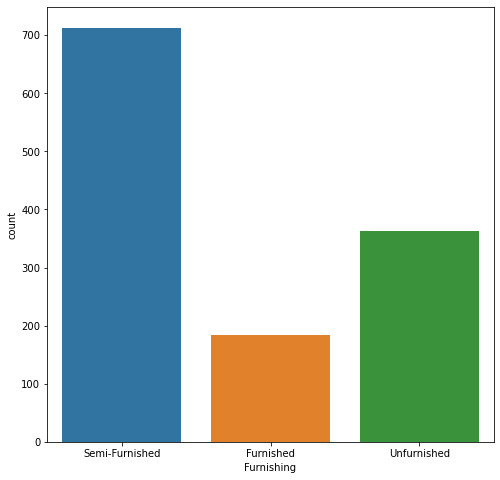

In [138]:
import seaborn as sns 
plt.figure(figsize=(8,8))
sns.countplot(df['Furnishing'])
print(df['Furnishing'].value_counts())

Ready_to_move    1184
Almost_ready       75
Name: Status, dtype: int64


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


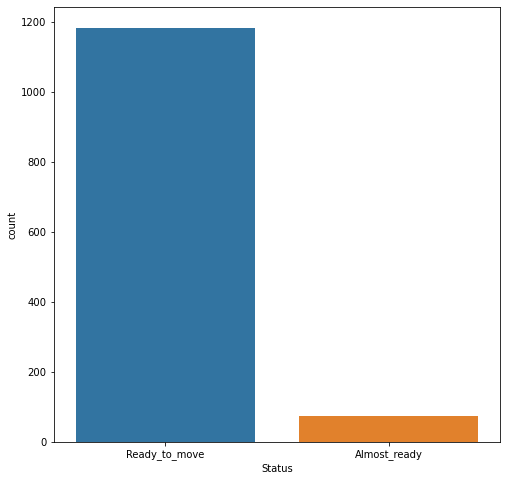

In [139]:
plt.figure(figsize=(8,8))
sns.countplot(df['Status'])
print(df['Status'].value_counts())

3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


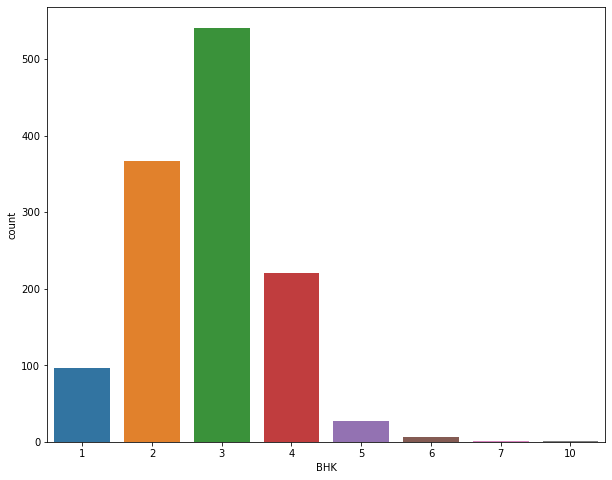

In [145]:
plt.figure(figsize=(10,8))
sns.countplot(df['BHK'])
print(df['BHK'].value_counts())

1.0      829
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: Parking, dtype: int64


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


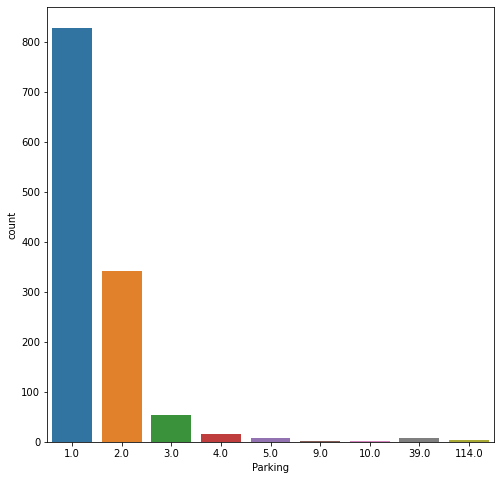

In [148]:
plt.figure(figsize=(8,8))
sns.countplot(df['Parking'])
print(df['Parking'].value_counts())

Builder_Floor    666
Apartment        593
Name: Type, dtype: int64


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


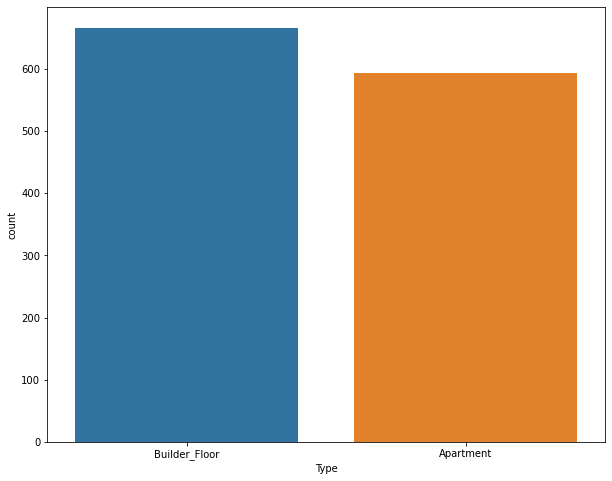

In [151]:
plt.figure(figsize=(10,8))
sns.countplot(df['Type'])
print(df['Type'].value_counts())

In [232]:
def calculate_mean_median_mode(data):
    # Calculate mean
    mean = sum(data) / len(data)

    # Calculate median
    sorted_data = sorted(data)
    midpoint = len(sorted_data) // 2
    if len(sorted_data) % 2 == 0:
        median = (sorted_data[midpoint] + sorted_data[midpoint - 1]) / 2
    else:
        median = sorted_data[midpoint]

    # Calculate mode
    mode_dict = {}
    for num in data:
        if num in mode_dict:
            mode_dict[num] += 1
        else:
            mode_dict[num] = 1
    max_freq = max(mode_dict.values())
    mode = [num for num, freq in mode_dict.items() if freq == max_freq]

    return mean, median, mode



Mean_Price = 21306703.733121525, Median_Price = 14200000, Mode_Price = [15000000]


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


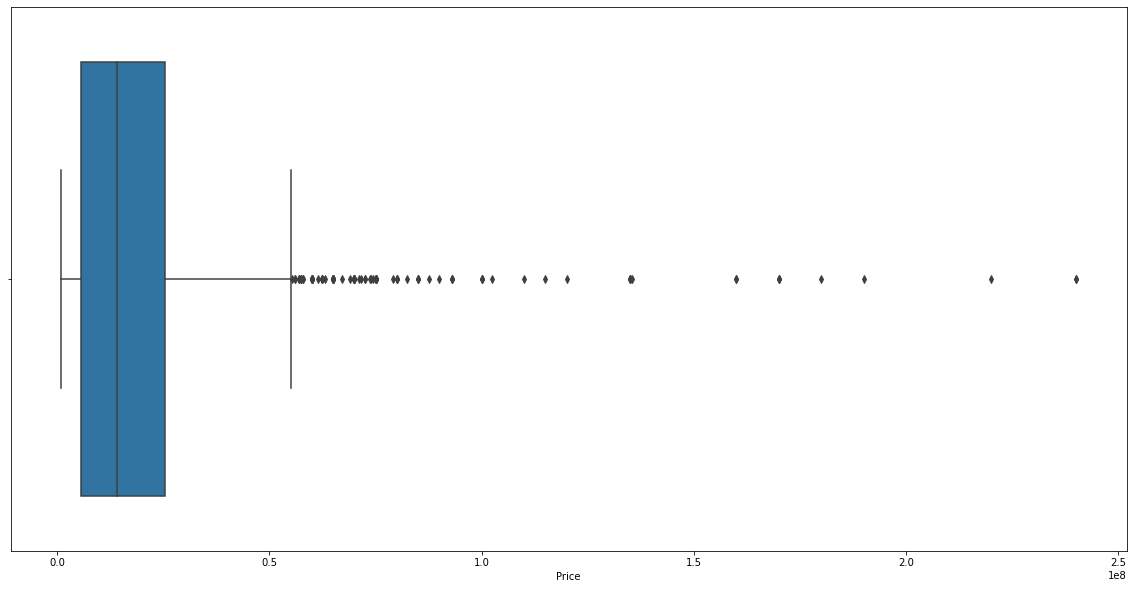

In [236]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Price'],ax=ax)


mean, median, mode = calculate_mean_median_mode(df['Price'])
print(f"Mean_Price = {mean}, Median_Price = {median}, Mode_Price = {mode}")

Mean_Area = 1466.4527241461476, Median_Area = 1200.0, Mode_Area = [900.0]


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


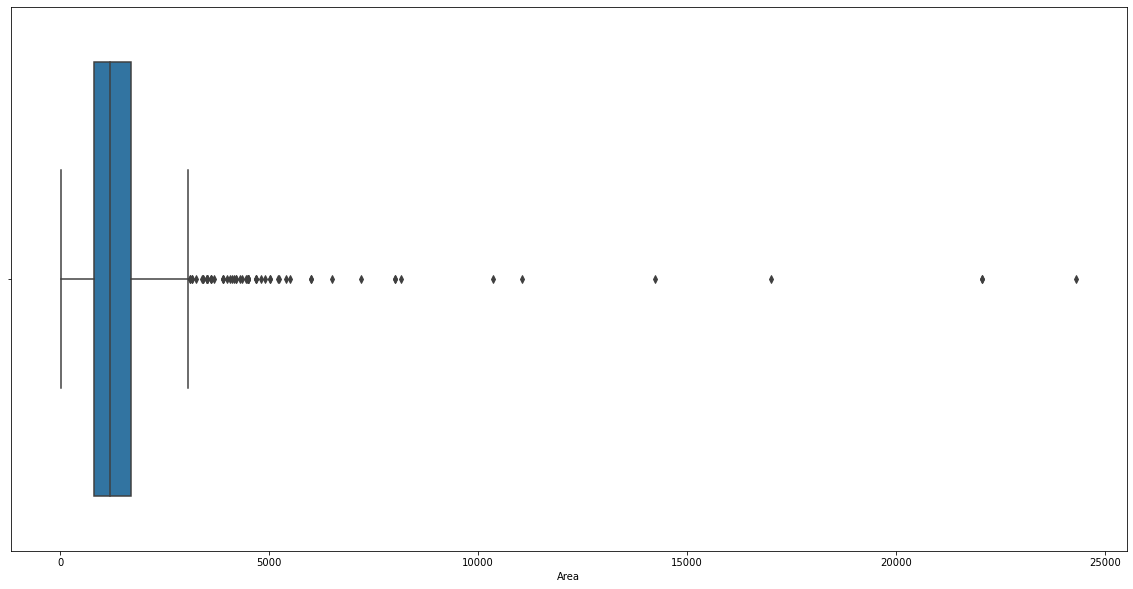

In [237]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Area'],ax=ax)
mean, median, mode = calculate_mean_median_mode(df['Area'])
print(f"Mean_Area = {mean}, Median_Area = {median}, Mode_Area = {mode}")

Mean_Per_Sqft = 14848.141779189833, Median_Per_Sqft = 11291.5, Mode_Per_Sqft = [11291.5]


D:\ANAconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


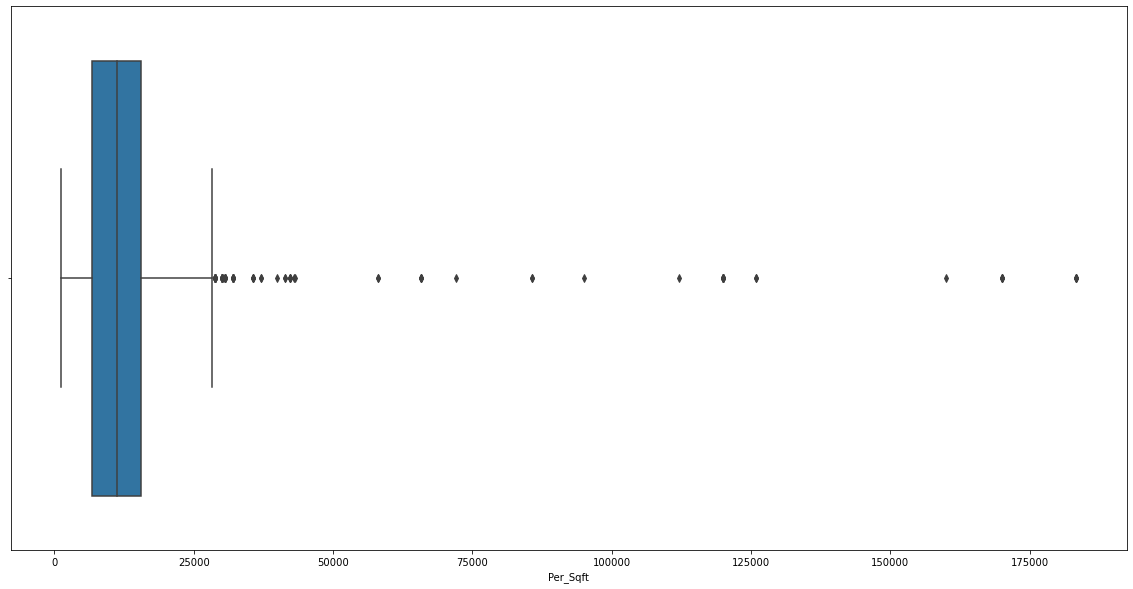

In [260]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(df['Per_Sqft'],ax=ax)
mean, median, mode = calculate_mean_median_mode(df['Per_Sqft'])
print(f"Mean_Per_Sqft = {mean}, Median_Per_Sqft = {median}, Mode_Per_Sqft = {mode}")

D:\ANAconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

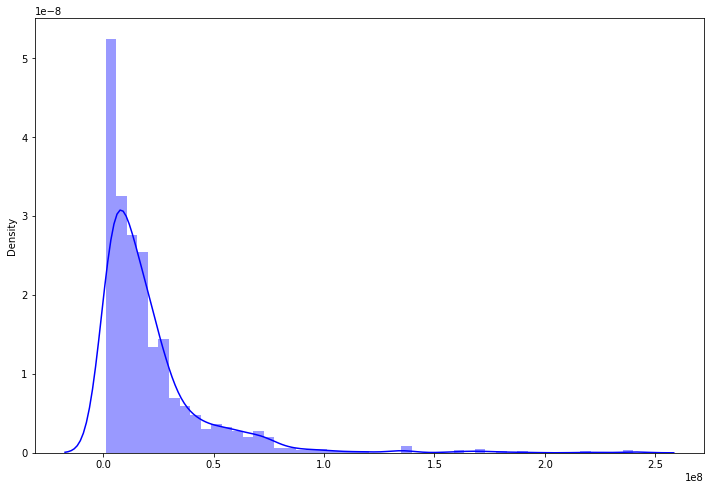

In [373]:
plt.figure(figsize=(12,8))
sns.distplot(x=df["Price"],color="blue")

# Bivariate Analysis

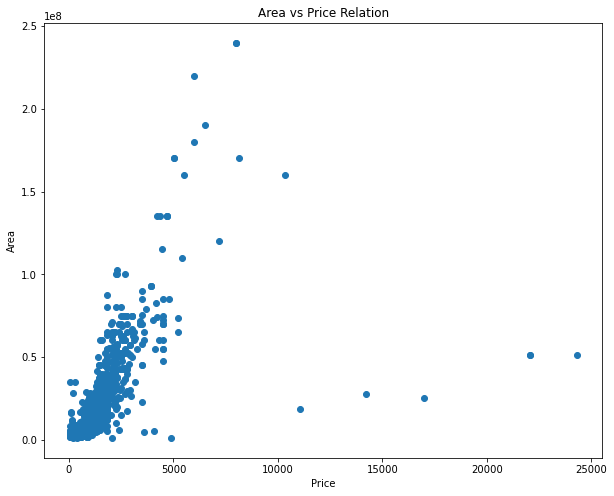

In [147]:
plt.figure(figsize=(10,8))
plt.scatter('Area', 'Price',data=df)
plt.title('Area vs Price Relation')
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

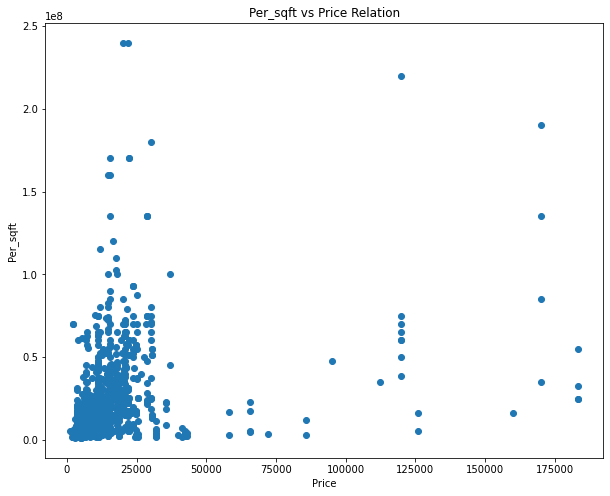

In [162]:
x1=df.Per_Sqft.astype(int)
plt.figure(figsize=(10,8))
plt.scatter(x1, 'Price',data=df)
plt.title('Per_sqft vs Price Relation')
plt.xlabel("Price")
plt.ylabel("Per_sqft")
plt.show()

In [247]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,11291.5
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


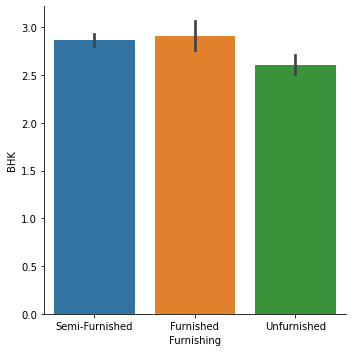

In [272]:
sns.catplot(x='Furnishing', y='BHK', kind='bar', data=df)

# Show the plot
plt.show()

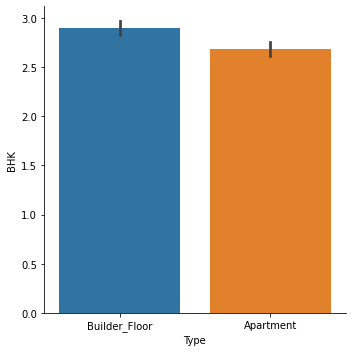

In [277]:
sns.catplot(x='Type', y='BHK', kind='bar', data=df)
plt.show()

# Checking for Correlation 

<AxesSubplot:>

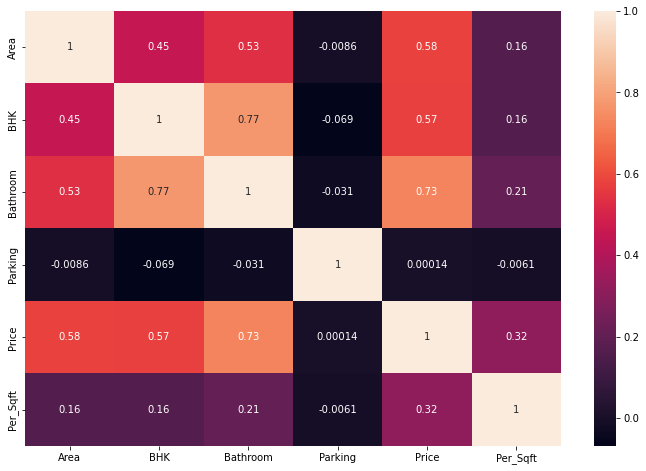

In [171]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [197]:
def correlated_columns(df):
    # List to store column names
    col_corr = []
    # Iterate through columns of the dataframe
    for i in range(0, df.shape[1]):
        # Store the column name
        col_name = df.columns[i]
        # Calculate correlation with other columns
        corr = df.corr()[col_name].abs().sort_values(ascending=False)[1:]
        # Store columns with correlation greater than 0.8
        if len(corr[corr > 0.8]) > 0:
            col_corr.append(col_name) 
    # Print out the list of highly correlated columns
    print(col_corr)
    


In [198]:
df_numerical=df.select_dtypes(include=np.number)
correlated_columns(df_numerical)

[]


# #Performing feature encoding on the dataset 


In [32]:
df_dummy=pd.get_dummies(df_main.Type,drop_first=True)

In [35]:
df_main.drop(columns='Type',inplace=True)

In [37]:
df_main=pd.concat([df_main,df_dummy],axis=1)

In [39]:
df_main.Area=df_main.Area.astype(int)

In [41]:
df_main.Bathroom=df_main.Bathroom.astype(int)

In [43]:
df_main.Parking=df_main.Parking.astype(int)

In [45]:
df_main.Furnishing.unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [47]:
df_main.Furnishing=df_main.Furnishing.map({'Semi-Furnished':1,'Furnished':2,'Unfurnished':0})

In [52]:
df_main.Status.unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [53]:
df_main.Status=df_main.Status.map({'Ready_to_move':1,'Almost_ready':0})

In [55]:
df_main.Transaction.unique()

array(['New_Property', 'Resale'], dtype=object)

In [56]:
df_main.Transaction=df_main.Transaction.map({'New_Property':1,'Resale':0})

In [57]:
df_main

,index,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing,Locality,Status,Transaction,Builder_Floor
0,0,800,3,2,1,6500000,11291.5,1,Rohini Sector 25,1,1,1
1,1,750,2,2,1,5000000,6667.0,1,"J R Designers Floors, Rohini Sector 24",1,1,0
2,2,950,2,2,1,15500000,6667.0,2,"Citizen Apartment, Rohini Sector 13",1,0,0
3,3,600,2,2,1,4200000,6667.0,1,Rohini Sector 24,1,0,1
4,4,650,2,2,1,6200000,6667.0,1,Rohini Sector 24 carpet area 650 sqft status R...,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1254,4118,4,5,3,55000000,12916.0,0,Chittaranjan Park,1,1,1
1255,1255,1050,3,2,3,12500000,12916.0,1,Chittaranjan Park,1,0,1
1256,1256,875,3,3,3,17500000,12916.0,1,Chittaranjan Park,1,1,1
1257,1257,990,2,2,1,11500000,12916.0,0,Chittaranjan Park Block A,1,0,1


# Dropping Locality 


In [ ]:
##df_main.drop(columns='Locality',inplace=True)

# Performing Train Test Split

In [334]:
X=df_main.drop(columns='Price')
y=df_main['Price']

In [335]:
X

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing,Status,Transaction,Builder_Floor
0,800,3,2,1,11291.5,1,1,1,1
1,750,2,2,1,6667.0,1,1,1,0
2,950,2,2,1,6667.0,2,1,0,0
3,600,2,2,1,6667.0,1,1,0,1
4,650,2,2,1,6667.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1254,4118,4,5,3,12916.0,0,1,1,1
1255,1050,3,2,3,12916.0,1,1,0,1
1256,875,3,3,3,12916.0,1,1,1,1
1257,990,2,2,1,12916.0,0,1,0,1


In [312]:
y

0        6500000
1        5000000
2       15500000
3        4200000
4        6200000
          ...   
1254    55000000
1255    12500000
1256    17500000
1257    11500000
1258    18500000
Name: Price, Length: 1259, dtype: int64

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1007, 9)
Shape of X_test: (252, 9)
Shape of y_train: (1007,)
Shape of y_test: (252,)


# Scaling the dataset

In [314]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [315]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [316]:
from sklearn.ensemble import AdaBoostRegressor


# Load the Boston dataset

X = X_train
y = y_train

# Create an AdaBoost regressor
regr = AdaBoostRegressor()

# Fit the model
regr.fit(X,y)

# Make predictions
predictions = regr.predict(X_test)

In [317]:
predictions

array([1.84218579e+07, 1.99436496e+07, 1.01572222e+07, 2.88567164e+07,
       2.57470339e+07, 2.98756757e+07, 3.08765306e+07, 2.75857143e+07,
       2.72469388e+07, 5.07627027e+07, 1.01572222e+07, 1.01572222e+07,
       2.72469388e+07, 2.75857143e+07, 1.01572222e+07, 2.98756757e+07,
       1.35450667e+07, 2.72469388e+07, 2.71206573e+07, 1.11779581e+07,
       2.71206573e+07, 1.35450667e+07, 3.08765306e+07, 4.57571324e+07,
       1.60137500e+07, 1.35450667e+07, 2.98756757e+07, 2.71206573e+07,
       2.98756757e+07, 4.15868627e+07, 2.75857143e+07, 1.85941000e+07,
       9.51318182e+07, 1.99436496e+07, 1.01572222e+07, 1.72967376e+07,
       1.01572222e+07, 2.71206573e+07, 1.01572222e+07, 1.35450667e+07,
       2.75857143e+07, 1.01572222e+07, 2.71206573e+07, 2.71206573e+07,
       1.01572222e+07, 3.47315315e+07, 1.11779581e+07, 1.01572222e+07,
       2.76521538e+07, 2.44986316e+07, 1.01572222e+07, 1.01572222e+07,
       1.01572222e+07, 2.88567164e+07, 4.38449275e+07, 2.88567164e+07,
      

In [318]:
scores = cross_val_score(regr, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())


Mean cross-validataion score: 0.77


In [319]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.76


In [320]:
ypred = regr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)
MSE: 15.82 
print("RMSE: %.2f" % np.sqrt(mse))
RMSE: 3.98  

MSE: 116826302628118.45
RMSE: 10808621.68


In [321]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of all values we want to test
param_grid = {'n_estimators':[100, 500, 1000], 
              'learning_rate': [0.001, 0.01, 0.1, 0.5, 1], 
              'loss':['linear', 'square', 'exponential']
             }

# use gridsearch to test all values
grid = GridSearchCV(regr, param_grid, cv = 3)

# fit model to data
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}
AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100)


In [322]:
from sklearn.ensemble import AdaBoostRegressor


# Load the Boston dataset

X = X_train
y = y_train

# Create an AdaBoost regressor
regr_final = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100)

# Fit the model
regr_final.fit(X,y)

# Make predictions
predictions = regr_final.predict(X_test)

In [323]:
predictions 

array([1.89116901e+07, 1.70757407e+07, 1.06145783e+07, 2.17244713e+07,
       1.81630159e+07, 2.57068182e+07, 3.23368224e+07, 2.24734862e+07,
       2.17244713e+07, 5.81500000e+07, 1.06145783e+07, 1.29892857e+07,
       2.24734862e+07, 2.62513333e+07, 1.06145783e+07, 2.50837313e+07,
       1.14928854e+07, 2.17244713e+07, 2.09148148e+07, 1.10799000e+07,
       2.08982759e+07, 1.35246914e+07, 3.31824000e+07, 4.74995833e+07,
       2.19611111e+07, 1.35246914e+07, 2.53836923e+07, 2.09148148e+07,
       2.57068182e+07, 3.76354167e+07, 2.25913043e+07, 1.81630159e+07,
       8.69263158e+07, 1.70757407e+07, 1.06145783e+07, 1.52084112e+07,
       1.11138182e+07, 2.09148148e+07, 1.29892857e+07, 1.94151737e+07,
       2.25913043e+07, 1.06145783e+07, 2.03706897e+07, 2.05196078e+07,
       1.09700000e+07, 3.73904762e+07, 1.10799000e+07, 1.10120290e+07,
       2.52683824e+07, 2.14394571e+07, 1.29892857e+07, 1.06145783e+07,
       1.06145783e+07, 2.24734862e+07, 4.74995833e+07, 2.32915385e+07,
      

In [324]:
scores = cross_val_score(regr_final, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())


Mean cross-validataion score: 0.79


In [360]:
ypred = regr_final.predict(X_test)

In [361]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [362]:
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

# Print the evaluation metrics
print("Mean Absolute Error: %.2f" % mae)
print("Mean Squared Error: %.2f" % mse)
print("R2 Score: %.2f" % r2)

Mean Absolute Error: 7705989.55
Mean Squared Error: 107730441677200.06
R2 Score: 0.84


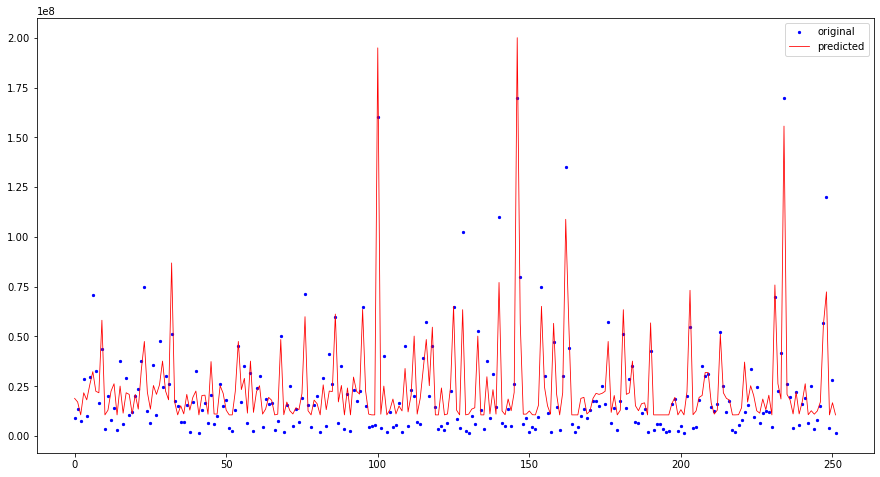

In [368]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.rcParams['figure.figsize'] = (12, 8)

plt.legend()
plt.show()


In [327]:
# Calculate the feature importances
importances = regr_final.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.555408)
2. feature 2 (0.246014)
3. feature 4 (0.108661)
4. feature 3 (0.040995)
5. feature 1 (0.024593)
6. feature 7 (0.009608)
7. feature 6 (0.006767)
8. feature 5 (0.006633)
9. feature 8 (0.001320)


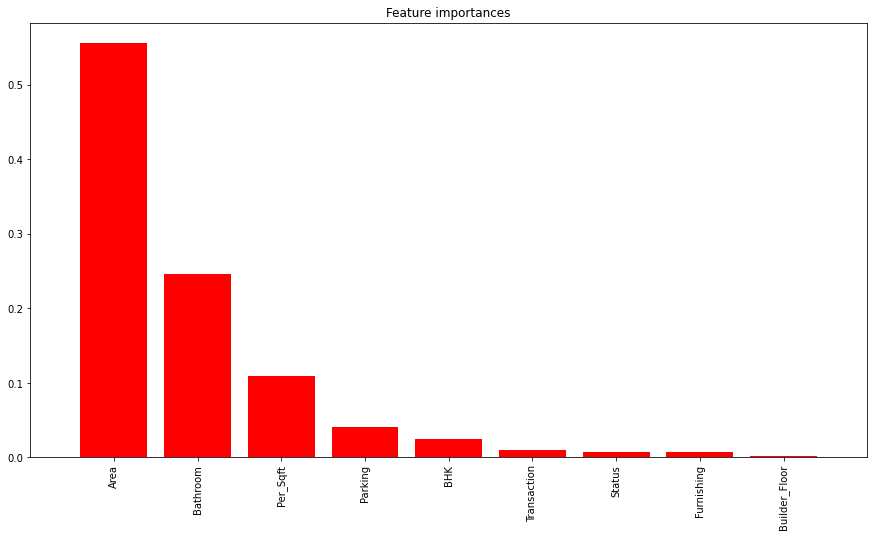

In [364]:
importances = regr_final.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(15,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="red", align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
